In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Load data
data = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
 
# Get features (pictures) and labels (persons)
_, h, w = data.images.shape # h is height, w is width
X = data.data
y = data.target
X.shape, y.shape

((1140, 1850), (1140,))

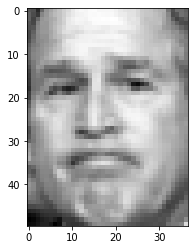

In [6]:
# Show example image
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

In [7]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((798, 1850), (342, 1850), (798,), (342,))

## KNN

In [8]:
# Paramter grid for knn
param_grid_knn = {
    'clf__n_neighbors': range(1, 10),
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Build pipeline
pipe_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier())
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe_knn, param_grid_knn).fit(X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__metric': 'manhattan', 'clf__n_neighbors': 9, 'clf__weights': 'distance'}

In [9]:
# Show score of best estimator
grid_search.best_score_

0.674190251572327

In [10]:
def conf_mat(y_true, y_pred, title='Confusion matrix', target_names=None):
    """Plot confusion matrix as heatmap.
    
    Parameters
    ----------
        y_true : ndarray of shape (n_samples,)
            True labels.
        y_pred : ndarray of shape (n_samples,)
            Predicted labels.
        target_names : list of strings
            Names of the labels.
    """
    df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), target_names,
                         target_names)
    sn.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title(title)

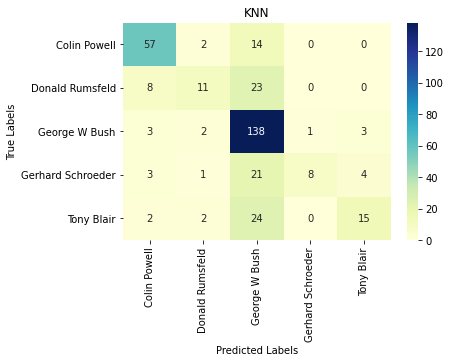

In [11]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.predict(X_test), "KNN", data.target_names)

## Logistic regression

In [12]:
# Paramter grid for knn
param_grid_logreg = {
    'clf__C': [0.5, 1, 5, 10],
}

# Build pipeline
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe_logreg, param_grid_logreg).fit(
    X_train, y_train)

# Show best estimator
grid_search.best_params_

/home/j/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/j/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'clf__C': 0.5}

In [13]:
# Show score of best estimator
grid_search.best_score_

0.8596383647798742

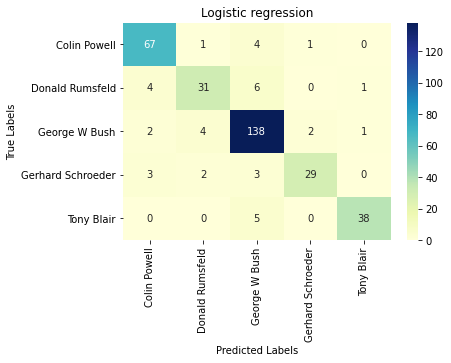

In [14]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.best_estimator_.predict(X_test),
         "Logistic regression", data.target_names)

# SVM

In [15]:
# Paramter grid for knn
param_grid_svm = {
    'clf__C': [0.5, 1, 5, 10],
}

# Build pipeline
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear'))
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe_svm, param_grid_svm).fit(X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__C': 0.5}

In [16]:
# Show score of best estimator
grid_search.best_score_

0.8421698113207547

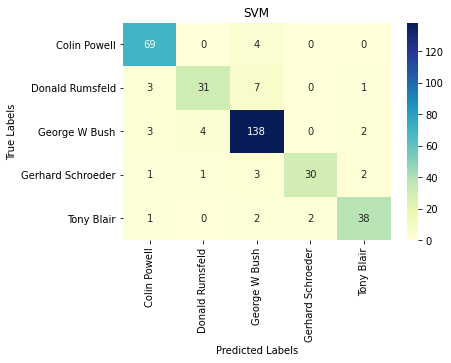

In [17]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.best_estimator_.predict(X_test),
         "SVM", data.target_names)